In [1]:
import scanpy as sc
import warnings

LOADING THE NECESSARY DATA

In [2]:
#Dataset
pbmc = sc.datasets.pbmc68k_reduced()

#List of genes of interest
gene_list = ['CD79A', 'MS4A1', 'FCER1A', 'CST3', 'FCGR3A', 'GNLY', 'NKG7', 'IGLL1', 'IGJ', 'CD3D']

#Calculation of clusters
sc.tl.leiden(pbmc, key_added='clusters', resolution=0.5)

#Mapping clusters to cell annotations
cluster2annotation = {
    '0': 'Monocytes',
     '1': 'Dendritic',
     '2': 'T-cell',
     '3': 'NK',
     '4': 'B-cell',
     '5': 'Dendritic',
     '6': 'Plasma',
     '7': 'Other',
     '8': 'Dendritic',
}
pbmc.obs['cell type'] = pbmc.obs['clusters'].map(cluster2annotation).astype('category')

#Marker gene set
marker_genes_dict = {
    'B-cell': ['CD79A', 'MS4A1'],
    'Dendritic': ['FCER1A', 'CST3'],
    'Monocytes': ['FCGR3A'],
    'NK': ['GNLY', 'NKG7'],
    'Other': ['IGLL1'],
    'Plasma': ['IGJ'],
    'T-cell': ['CD3D'],
}

THE MATRIXPLOT CHOSEN TO ADD MODIFICATIONS

categories: 0, 1, 2, etc.
var_group_labels: B-cell, Dendritic, Monocytes, etc.


/usr/local/lib/python3.11/site-packages/scanpy/plotting/_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()
/usr/local/lib/python3.11/site-packages/scanpy/tools/_dendrogram.py:135: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_df = rep_df.groupby(level=0).mean()


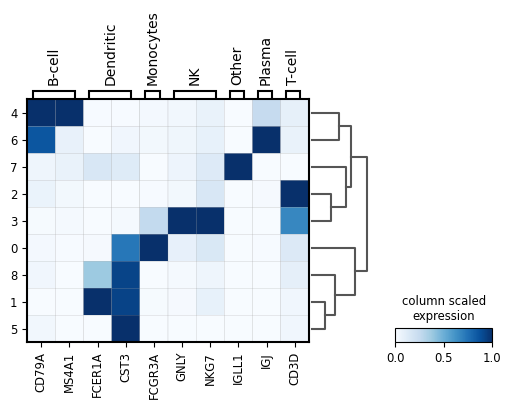

In [3]:

sc.pl.matrixplot(pbmc, marker_genes_dict, 'clusters', dendrogram=True, cmap='Blues', standard_scale='var', colorbar_title='column scaled\nexpression')

MODIFICATION OF THE MATRIXPLOT WITH WIDGETS

In [9]:
from _matrixPlot_widget import InteractiveMatrixPlot
warnings.filterwarnings('ignore')

ip = InteractiveMatrixPlot(pbmc, gene_list)
ip.display_widgets()

SelectMultiple(description='Genes', options=('CD79A', 'MS4A1', 'FCER1A', 'CST3', 'FCGR3A', 'GNLY', 'NKG7', 'IG…

SelectMultiple(description='Cell Types', options=('Monocytes', 'NK', 'T-cell', 'Dendritic', 'Plasma', 'B-cell'…

Dropdown(description='Scale:', options=('var', 'obs', None), value='var')

Dropdown(description='Color Map:', index=5, options=('viridis', 'plasma', 'inferno', 'magma', 'cividis', 'Blue…

Button(description='Update Graph', style=ButtonStyle())

Output()

MODIFICATION OF THE MATRIXPLOT WITH PLOTLY

In [5]:
from _dynamicMatrixPlot import DynamicMatrixPlot
warnings.filterwarnings('ignore')

dynamic_plot = DynamicMatrixPlot(pbmc, gene_list, 'cell type')
dynamic_plot.compute_stats(marker_genes_dict, pbmc)
dynamic_plot.display_widgets(marker_genes_dict)